## 2.栗まんじゅう問題

漫画ドラえもんには「バイバイン」という道具が登場する、2のn乗に関する有名なエピソード[1]があります。


[1] 藤子・Ｆ・不二雄(1979)『ドラえもん（１７）』小学館.


「バイバイン」は薬品で、これを振掛けるとその物体は5分ごとに倍に増えるという働きがあります。作中では栗まんじゅうを増やしますが、食べきれなくなったためロケットを使い宇宙に捨てました。


ここで度々話題になるのが、栗まんじゅうはその後宇宙でどのように増えていくのかについてです。様々な議論がされていますが、今回は単純に栗まんじゅうの体積がどう増えるかを計算してみましょう。


## 【問題】栗まんじゅうが太陽系を覆う日
1個の栗まんじゅうにバイバインを振りかけた場合、太陽系が栗まんじゅうで覆われるのは何分後でしょうか。これを計算するプログラムを作成してください。


栗まんじゅうや太陽系の体積を調査した上で仮定して計算してください。栗まんじゅうの隙間や重力などは考えず、問題を単純化して構いません。


ボールにバイバインを振りかけた時、東京ドームが一杯になる時間など他の状況にも適用できるような汎用的なプログラムを作成してください。また、グラフを表示するなど分かりやすいノートブックを作成してください。

## 太陽系の体積計算に使用したデータの出所

<a href="https://readyfor.jp/projects/starry/announcements/101675" target="_blank" style="text-decoration: none">【宇宙の単位②】太陽系内の距離感は？「天文単位」について！  READYFORサイトより</a>

>１天文単位 = 1AU = 約1億5000万km<br>
>この天文単位を使って太陽から太陽系内の各惑星までの距離を見てみましょう。<br>
>太陽から水星まで………0.3871AU<br>
>太陽から金星まで………0.7233AU<br>
>太陽から地球まで………1.0000AU<br>
>太陽から火星まで………1.5237AU<br>
>太陽から木星まで………5.2026AU<br>
>太陽から土星まで………9.5549AU<br>
>太陽から天王星まで………19.2184AU<br>
>太陽から海王星まで………30.1104AU<br>

In [1]:
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 栗まんじゅうの体積（底辺5cm,高さ3cmの円柱形と仮定）
MANJUU_CM = (5/2)**2 * np.pi * 3      # 単位cm
MANJUU_KM = MANJUU_CM / (100*1000)**3 # 単位km

# 太陽系の体積（太陽から海王星までの距離を半径とする球体と仮定）
AU = 150000000   # 1天文単位 = 1AU = 約1億5000万km
SOLAR_SYSTEM_R = 30.1104 * AU   # 太陽から海王星までの半径（30.1104AU）
SOLAR_SYSTEM_V = (4/3) * np.pi * SOLAR_SYSTEM_R**3
  

In [3]:
"""
パターン1 whileを使用
"""

def baibain(vol_1, vol_2):
    """
    volume_1の体積が5分後に2倍になるとき、
    volume_2の体積を超えるまでに要する時間(分)を計算する関数

    Parameters
    ---------------
    vol_1 : float
        倍増させる体積
    vol_2 : float
        上限とする体積
    
    Returns
    ---------------
    after_time : int
        volume_1がvolume_2を超すまでの時間(分)
    vol_change : list
        volume_1の体積の推移
    """
    
    # 変数
    vol_change = [vol_1]
    count = 0
    
    while vol_1 < vol_2:
        vol_1 *= 2
        vol_change.append(vol_1)
        count += 1
    after_time = count * 5
        
    return after_time, vol_change


time, vol_list = baibain(MANJUU_KM, SOLAR_SYSTEM_V)
print("太陽系が栗まんじゅうに覆われるまでの時間：{}分".format(time))
   

太陽系が栗まんじゅうに覆われるまでの時間：715分


In [4]:
"""
パターン2 forを使用
　・ループ回数が未確定のため、上限値を設定（変数：ROOP）
　・ループ上限に達したら例外を送出（処理自体は中断しない）
 ※異常終了する状態で提出しております。
"""

def baibain_2(vol_1, vol_2):
    vol_change = [vol_1]
    count = 0
    ROOP = 100
    
    try:
        for i in range(ROOP):
            # 栗まんじゅうが太陽系を超えたらbreak
            if vol_1 > vol_2:
                break
                
            # 栗まんじゅうが太陽系を超えない間は体積を2倍
            else:
                vol_1 *= 2
                count += 1
                vol_change.append(vol_1)
                
            # ループ上限を超えたら例外を送出
            if i == ROOP-1 and vol_1 <= vol_2:
                    raise Exception
        pass
    except Exception as e:
        print('[FATAL] 異常終了しました。')
        print('[FATAL] ループ上限数に達したため入力値か変数ROOPを見直してください。')
        print(type(e))
        
    else:
        print('[INFO] 正常終了しました。')
    
    after_time = count * 5   # countから時間を算出
    return after_time, vol_change

time2, vol_list2 = baibain_2(MANJUU_KM, SOLAR_SYSTEM_V)
print("太陽系が栗まんじゅうに覆われるまでの時間：{}分".format(time2))

[FATAL] 異常終了しました。
[FATAL] ループ上限数に達したため入力値か変数ROOPを見直してください。
<class 'Exception'>
太陽系が栗まんじゅうに覆われるまでの時間：500分


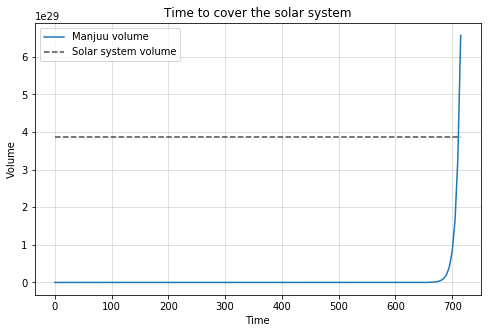

In [5]:
# 栗まんじゅうの体積推移をグラフ化
plt.figure(figsize=(8, 5))
plt.plot(np.arange(0, len(vol_list)*5, 5), vol_list, label='Manjuu volume')
plt.title("Time to cover the solar system")
plt.xlabel("Time")
plt.ylabel("Volume")

plt.hlines([SOLAR_SYSTEM_V], 0, time, linestyle="dashed", alpha=0.7, label='Solar system volume')

plt.legend(loc='best')

plt.grid(True, linewidth=1.0, alpha=0.4)
plt.show()